In [2]:
import pandas as pd

df = pd.read_csv('Netflix Userbase.csv')

In [3]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [4]:
df.describe

<bound method NDFrame.describe of       User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0           1             Basic               10  15-01-22          10-06-23   
1           2           Premium               15  05-09-21          22-06-23   
2           3          Standard               12  28-02-23          27-06-23   
3           4          Standard               12  10-07-22          26-06-23   
4           5             Basic               10  01-05-23          28-06-23   
...       ...               ...              ...       ...               ...   
2495     2496           Premium               14  25-07-22          12-07-23   
2496     2497             Basic               15  04-08-22          14-07-23   
2497     2498          Standard               12  09-08-22          15-07-23   
2498     2499          Standard               13  12-08-22          12-07-23   
2499     2500             Basic               15  13-08-22          12-07-23   

     

In [5]:
df.info

<bound method DataFrame.info of       User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0           1             Basic               10  15-01-22          10-06-23   
1           2           Premium               15  05-09-21          22-06-23   
2           3          Standard               12  28-02-23          27-06-23   
3           4          Standard               12  10-07-22          26-06-23   
4           5             Basic               10  01-05-23          28-06-23   
...       ...               ...              ...       ...               ...   
2495     2496           Premium               14  25-07-22          12-07-23   
2496     2497             Basic               15  04-08-22          14-07-23   
2497     2498          Standard               12  09-08-22          15-07-23   
2498     2499          Standard               13  12-08-22          12-07-23   
2499     2500             Basic               15  13-08-22          12-07-23   

       

In [6]:
## Good for identifying problem areas

missing_values = df.isnull().sum()
print(missing_values)

if df.duplicated().any():
    print("Duplicates found!")
else:
    print("No duplicates found.")

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64
No duplicates found.


In [14]:
## Assign useful counts and info to variables for visualisation later

count_Subscription = df["Subscription Type"].value_counts()

## How many unique values in each column?
df.nunique()

User ID              2500
Subscription Type       3
Monthly Revenue         6
Join Date             300
Last Payment Date      26
Country                10
Age                    26
Gender                  2
Device                  4
Plan Duration           1
dtype: int64

In [ ]:
## Get statistics of each numerical column in dataset

df.describe().T.style.background_gradient(cmap='turbo')

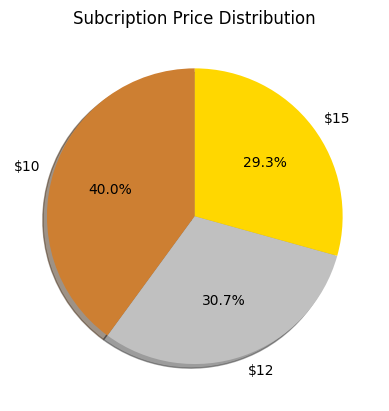

In [8]:
## example pie chart
import matplotlib.pyplot as plt

colors = ["#CD7F32", "#C0C0C0", "#FFD700"]

plt.pie(count_Subscription, labels=["$10", "$12", "$15"],
        colors=colors,
        autopct="%1.1f%%",
        shadow=True,
        startangle=90)
plt.title("Subcription Price Distribution")
plt.show()

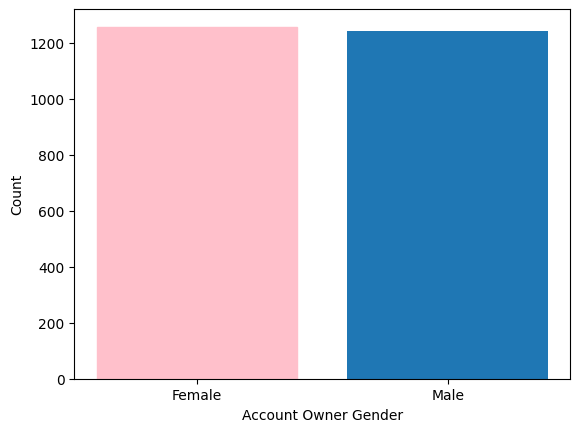

In [9]:
## example bar graph

## get count for gender column
count_Gender = df["Gender"].value_counts()

## index = Variable on x axis. values = actual count data on y axis
## set to variable 
bars = plt.bar(count_Gender.index, count_Gender.values)

## set colour example
bars[0].set_color("pink")

## assign labels
plt.xlabel("Account Owner Gender")
plt.ylabel("Count")

## display plot
plt.show()

In [10]:
## Examples of filtering data

country_List = df["Country"].unique()

## Filter by a single country

uk_userbase = df[df["Country"] == "United Kingdom"]

## Filter by multiple countries

countries_to_include = ["United Kingdom", "Canada"]

uk_can_userbase = df[df["Country"].isin(countries_to_include)]
print(uk_can_userbase)

      User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
1           2           Premium               15  05-09-21          22-06-23   
2           3          Standard               12  28-02-23          27-06-23   
11         12           Premium               15  23-03-23          28-06-23   
12         13          Standard               12  30-11-21          27-06-23   
21         22             Basic               10  22-07-22          28-06-23   
...       ...               ...              ...       ...               ...   
2472     2473          Standard               12  28-09-22          11-07-23   
2483     2484          Standard               11  29-07-22          13-07-23   
2486     2487           Premium               11  25-07-22          12-07-23   
2487     2488          Standard               11  18-07-22          13-07-23   
2498     2499          Standard               13  12-08-22          12-07-23   

             Country  Age  Gender      

In [11]:
## Examples of chain filtering data

filtered = uk_can_userbase[
    (uk_can_userbase["Gender"] == "Female") &
    ~(uk_can_userbase["Subscription Type"] == "Basic")
]

## ~ == not operator

filtered.head()


,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
12,13,Standard,12,30-11-21,27-06-23,United Kingdom,48,Female,Laptop,1 Month
22,23,Standard,12,05-12-21,27-06-23,United Kingdom,49,Female,Smart TV,1 Month
32,33,Standard,12,21-01-22,27-06-23,United Kingdom,41,Female,Laptop,1 Month
42,43,Standard,12,07-02-22,27-06-23,United Kingdom,36,Female,Smart TV,1 Month


In [12]:
## filter column if it contains a certain string
## useful for survey results or user input answers

twentythree_in_payment = df["Last Payment Date"].str.contains("23")
twentythree_in_payment.value_counts()

True    2500
Name: Last Payment Date, dtype: int64

In [13]:
## filter by age

fourty_or_older = df[df["Age"] > 39]
fourty_or_older.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
6,7,Standard,12,09-12-21,25-06-23,Brazil,46,Male,Tablet,1 Month
9,10,Premium,15,07-01-23,22-06-23,Italy,44,Female,Smart TV,1 Month
11,12,Premium,15,23-03-23,28-06-23,Canada,45,Male,Tablet,1 Month


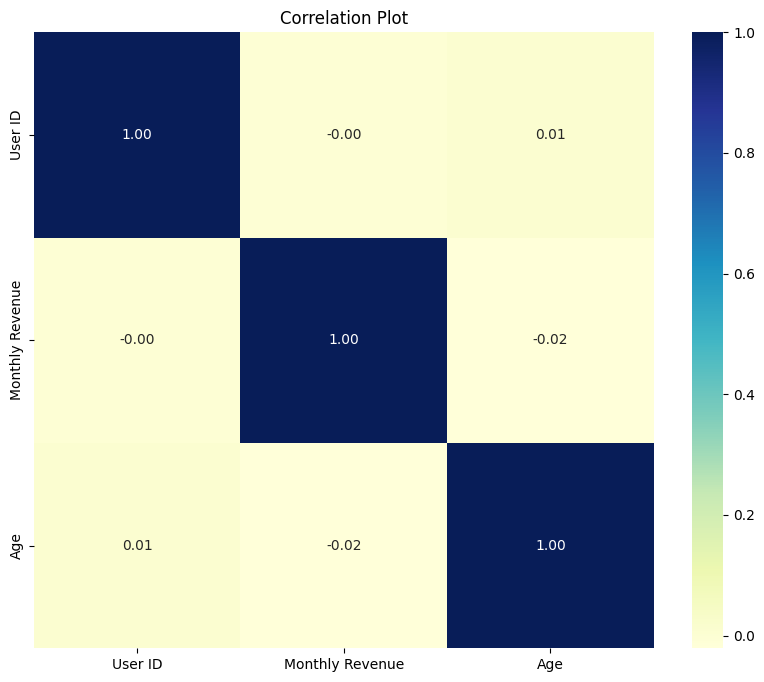

In [16]:
import seaborn as sns

## Add heatmap for ass numerical variables

corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Plot")
plt.show()